# Examine an image of comet C/2014 E2 (Jacques)

For this exercise, we will examine an image of comet C/2014 E2 (Jacques) taken with the BOPPS Infrared Camera (BIRC) onboard the Balloon Observation Platform for Planetary Science (BOPPS). The data are archived at the PDS Small Bodies Node: "Balloon Observation Platform for Planetary Science (BOPPS) 2014 Observations: BIRC Co-Added Images" by Cheng & Hibbits (2015), urn:nasa:pds:bopps2014:scoadded::v1.0. The data are available at: https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/SUPPORT/dataset.html.

The data set consists of aligned and coadded images of two comets and asteroid Ceres taken through a 0.67 μm filter, and a series of filters between 2 and 5 μm. The images are binary 2D arrays with PDS4 labels.

The following code is written for Python 3.

## Full script: Download, read, and display the image

**Important caveat:** In order to remain brief, this example does not attempt to provide the correct image orientation.

Processing label: jaha_0_5_0349_s_0491.xml
Now processing a Header structure: HEADER_0
Now processing a Array_2D_Image structure: Image
Now processing a Table_Character structure: TABLE_0

Axes for Array_2D_Image 'Image' (2 axes, 200 x 320): 

Line (200 elements)
Sample (320 elements)


<IPython.core.display.Javascript object>


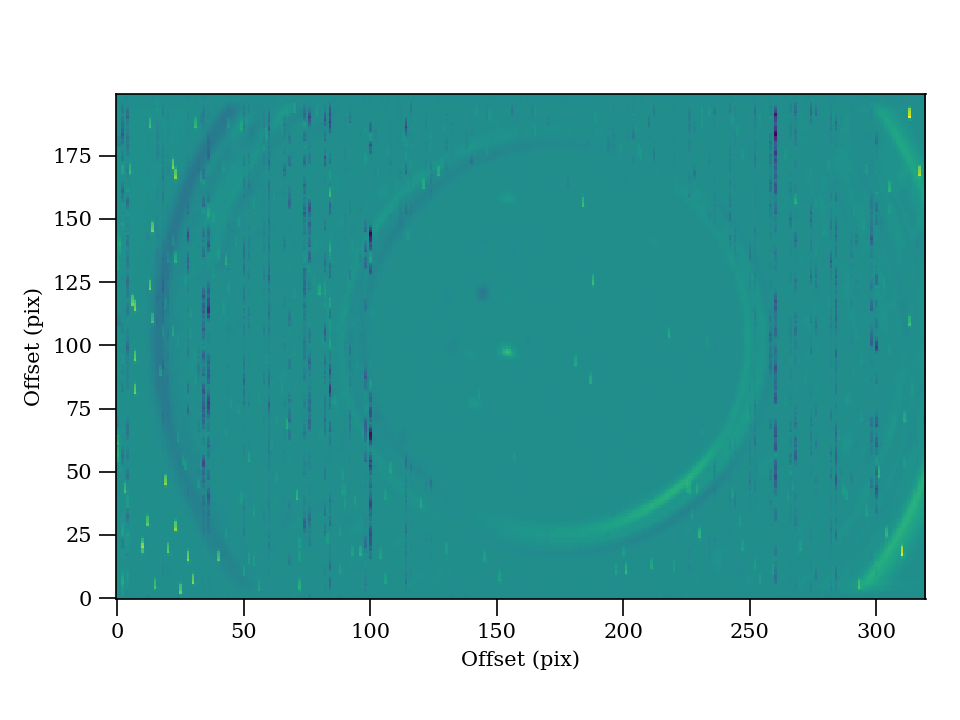

In [1]:
from urllib.request import urlretrieve # to download the data
from pds4_tools import pds4_read       # to read and inspect the data and metadata
import matplotlib.pyplot as plt        # for plotting

# for plotting in Jupyter notebooks
%matplotlib notebook

# Download data from PDS SBN.  A label and two associated data files. 
label_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/shift/c2014e2/fw5/jaha_0_5_0349_s_0491.xml', filename='jaha_0_5_0349_s_0491.xml')
image_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/shift/c2014e2/fw5/jaha_0_5_0349_s_0491.fit', filename='jaha_0_5_0349_s_0491.fit')
table_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/shift/c2014e2/fw5/jaha_0_5_0349_s_0491.tab', filename='jaha_0_5_0349_s_0491.tab')

# Read in the label.  If the data file is saved with the correct file name,
# then reading in the label with pds4_read will also read in the data.
data = pds4_read(label_fn)

# The data is an array named "Image".  There is also an associated table.
# Print out a summary of the image.
print()
data['Image'].info()

# Plot the image, including automatic labeling of the axis units.
fig, ax = plt.subplots()
ax.imshow(data['Image'].data)
labels = plt.setp(ax, xlabel='Offset (pix)', ylabel='Offset (pix)')
plt.tight_layout()

## Detailed example, including correct image orientation

### Download data from PDS SBN

In [2]:
from urllib.request import urlretrieve

# Download a label and two associated data files. 
label_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/shift/c2014e2/fw5/jaha_0_5_0349_s_0491.xml', filename='jaha_0_5_0349_s_0491.xml')
image_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/shift/c2014e2/fw5/jaha_0_5_0349_s_0491.fit', filename='jaha_0_5_0349_s_0491.fit')
table_fn, headers = urlretrieve('https://pdssbn.astro.umd.edu/holdings/pds4-bopps2014-v1.0/scoadded/shift/c2014e2/fw5/jaha_0_5_0349_s_0491.tab', filename='jaha_0_5_0349_s_0491.tab')

print('Downloaded label, table, and image:', label_fn, table_fn, image_fn, sep='\n  * ')

Downloaded label, table, and image:
  * jaha_0_5_0349_s_0491.xml
  * jaha_0_5_0349_s_0491.tab
  * jaha_0_5_0349_s_0491.fit


### Use `pds4_tools` to read in the label and data

In [3]:
from pds4_tools import pds4_read
data = pds4_read(label_fn)

Processing label: jaha_0_5_0349_s_0491.xml
Now processing a Header structure: HEADER_0
Now processing a Array_2D_Image structure: Image
Now processing a Table_Character structure: TABLE_0


### Inspect the label: The `<Observation_Area>` class

The `<Observation_Area>` class contains a series of classes used to describe the overall parameters of observational data (target, observing instrument, UTC, etc.). It is required in observational products, and may also be used in collection and bundle products, if desired.

Below we print:
* the immediate children of the `<Observation_Area>` tag,
* the start and stop times of the data set,
* the names of the observing system components used to create the data, and
* the contents of the BOPPS-specific meta data in the `<Mission_Area>`.

In [4]:
for e in data.label.findall('Observation_Area/*'):
    print('*', e.tag)

* Time_Coordinates
* Primary_Result_Summary
* Investigation_Area
* Observing_System
* Target_Identification
* Mission_Area
* Discipline_Area


In [5]:
print('Start:', data.label.find('Observation_Area/Time_Coordinates/start_date_time').text)
print('Stop:', data.label.find('Observation_Area/Time_Coordinates/stop_date_time').text)

Start: 2014-09-26T03:49:49.589Z
Stop: 2014-09-26T03:50:58.642Z


The `<Observing_System>` class documents the significant pieces of the observing equipment. It is used, for example, to associate instruments, spacecraft, or telescopes with the product. A user unfamiliar with the source of the data would discover these components via:

In [6]:
names = data.label.findall('Observation_Area/Observing_System/Observing_System_Component/name')
for name in names:
    print('*', name.text)

* BOPPS Gondola
* BOPPS Telescope
* Bopps Infra-Red Camera (BIRC)


In [7]:
bopps = data.label.find('Observation_Area/Mission_Area/bopps:observation_parameters')

# We can work with the XML element tree, as above, or with a convenient dictionary:
d = bopps.to_dict()
for k, v in d['bopps:observation_parameters'].items():
    print('* {}: {}'.format(k, v))

* bopps:spacecraft_clock_start_count: 1411703390.157298
* bopps:spacecraft_clock_stop_count: 1411703458.641734
* bopps:total_integration_time: 59299.000
* bopps:max_average_dn_for: 2357.048
* bopps:min_average_dn_for: 2113.878
* bopps:filter: 5
* bopps:filter_wavelength: 2.73
* bopps:product_type: SHIFTED
* bopps:observation_description: H2O filter positions, set A, Jacques
* bopps:pointing_description: fixed on commanded ra, dec
* bopps:centx: 154
* bopps:centy: 102


In [8]:
# However, the dictionary approach does lose some meta data, e.g., the units
# on filter_wavelength
wave = bopps.find('.//bopps:filter_wavelength')
print('Filter wavelength:', wave.text, wave.get('unit'))

Filter wavelength: 2.73 micrometer


### Inspect the data structure
The file format can be discovered via the archive documentation or the label. In this case, we have two data files associated with the label: a fixed-width text-based table, and a binary 2D array. However, this knowledge is not critical beforehand if one using the PDS4 tools. Product metadata is read in by the module, and can be inspected to help the user understand the data structure:

In [9]:
data.info()

0   Header           'HEADER_0'  FITS 3.0
1   Array_2D_Image   'Image'     2 axes, 200 x 320
2   Table_Character  'TABLE_0'   3 fields x 120 records


### Display the image with the data provider's intended orientation
The [`<Display_Settings>`](http://sbndev.astro.umd.edu/wiki/Filling_Out_the_Display_Dictionary_Classes) class describes how to display the array.  It describes which array axis should be displayed horizontally, which axis should be displayed vertically, and in which direction each axis should be drawn, e.g., left to right, top to bottom.

This example uses `matplotlib`.  It can draw top to bottom, or bottom to top, but the horizontal display is always left to right.  We will transform the image so that it will be correctly oriented when drawn from bottom to top with `matplotlib`.

In [10]:
# The following uses a short cut since we know there is only one image and one Display_Settings in this label
disp = data.label.find('.//disp:Display_Settings')

# We know this is a 2D array, so we only need to indentify one axis.  The `haxis` line is another short cut.
horz = disp.find('disp:Display_Direction/disp:horizontal_display_axis').text
haxis = data.label.find('.//Axis_Array[axis_name="{}"]/sequence_number'.format(horz))

# make a copy of the array and put it in the correct orientation for a lower left origin
im = data['Image'].data.copy()
if haxis == '2':
    im = im.T  # Swap axes

# Indices are row-major order / last index fastest: disp[vertical, horizontal]
hdisp = disp.find('disp:Display_Direction/disp:horizontal_display_direction').text
vdisp = disp.find('disp:Display_Direction/disp:vertical_display_direction').text
if 'Right to Left' in hdisp:
    im = im[:, ::-1]  # invert horizontal axis
if 'Top to Bottom' in vdisp:
    im = im[::-1]     # invert vertical axis

print('\nDisplay directions: {}, {}'.format(hdisp, vdisp))


Display directions: Left to Right, Top to Bottom


Get the target's x, y position from the BOPPS mission area.

In [11]:
bopps = data.label.find('Observation_Area/Mission_Area/bopps:observation_parameters')
cx = int(bopps.find('bopps:centx').text)
cy = int(bopps.find('bopps:centy').text)
extent = (-cx, im.shape[1] - cx, -cy, im.shape[0] - cy)  # for axis labels via imshow

Plot the image.  Notice how the orientation has changed from the quick example above.

<IPython.core.display.Javascript object>


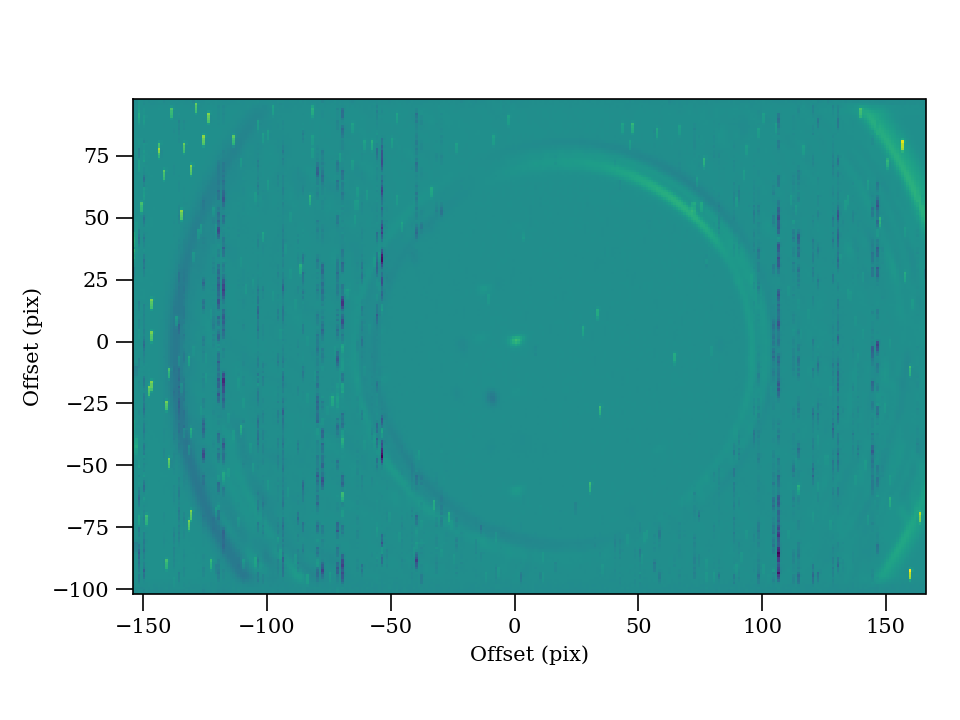

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(im, origin='lower', extent=extent)
labels = plt.setp(ax, xlabel='Offset (pix)', ylabel='Offset (pix)')
plt.tight_layout()
plt.savefig('image-example-c2014e2.png')

Finally, we define a `pds4_imshow` function that will perform the transformations and display the image.  This function is written without prior knowledge of the data and can be used in your own scripts. 

<IPython.core.display.Javascript object>


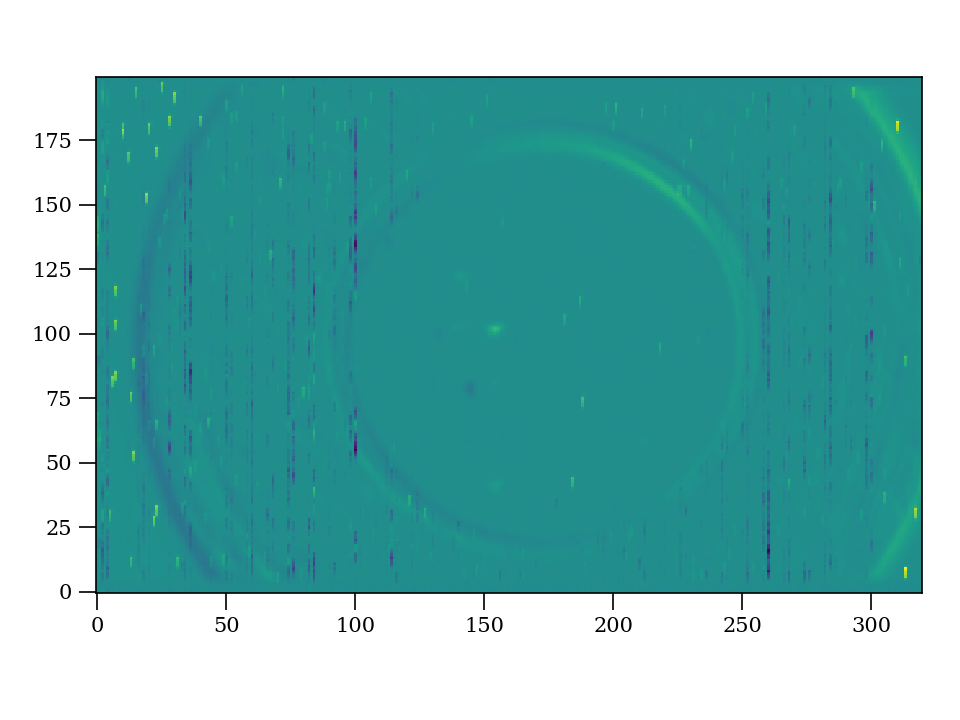

In [13]:
def pds4_imshow(data, image_name, ax=None, **kwargs):
    """Display a PDS4 2D image array with the correct orientation.

    Parameters
    ----------
    data : pds4_tools Structure
      The data structure from, e.g., `pds4_read`.
    image_name : string
      The local identifier for the image data to be displayed.
    ax : matplotlib Axis, optional
      The axis on which to display the image.
    **kwargs
      Any `matplotlib` `imshow` keyword arguments except `origin`.

    Example
    -------
    import matplotlib.pyplot as plt
    from pds4_tools import pds4_read
    data = pds4_read('jaha_0_5_0349_s_0491.xml')
    pds4_imshow(data, 'Image')
    
    """
    
    import matplotlib.pyplot as plt
    
    assert 'origin' not in kwargs
    
    if ax is None:
        ax = plt.gca()
    
    disp_dir = data.label.find('.//disp:Display_Settings/Local_Internal_Reference[local_identifier_reference="{}"]/../disp:Display_Direction'.format(image_name))
    horz = disp_dir.find('disp:horizontal_display_axis').text
    
    array = data.label.find('.//Array_2D_Image[local_identifier="{}"]'.format(image_name))
    haxis = array.find('Axis_Array[axis_name="{}"]/sequence_number'.format(horz))

    # make a copy of the array and put it in the correct orientation for a lower left origin
    im = data['Image'].data.copy()
    if haxis == '2':
        im = im.T  # Swap axes

    hdisp_dir = disp_dir.find('disp:horizontal_display_direction').text
    vdisp_dir = disp_dir.find('disp:vertical_display_direction').text
    if 'Right to Left' in hdisp_dir:
        im = im[:, ::-1]  # invert horizontal axis
    if 'Top to Bottom' in vdisp_dir:
        im = im[::-1]     # invert vertical axis

    ax.imshow(im, origin='lower', **kwargs)

fig, ax = plt.subplots()
pds4_imshow(data, 'Image', ax=ax)